#**Deep neural networks**

- - -

##**Forward and backward propagation**

- - -

###**학습목표**

- - -

Forward propagation 와 backward propagation 을 어떻게 구현할지 알아보자.

###**Forward propagation for layer l**

- - -

 Input $a^{[l-1]}$

 Output  $a^{[l]}$,cache($z^{[l]}$)

 $z^{[l]}$의 기능
 
* $w^{[l]}$ 와  $b^{[l]}$를 캐쉬한다.

* 프로그래밍 예제에서 합수 호출을 더쉽게 만들어준다.




###**Forward propagation vectorization**

- - -

 $Z^{[l]}$=$w^{[l]}$$a^{[l-1]}$+$b^{[l]}$

 $A^{[l]}$=$g^{[1]}(Z^{[1]}$) 


*  X= $A^{[0]}$
* $a^{[0]}$:한번에 하나씩 할 경우의 학습 데이터에 대한 입력 특성
* $A^{[0]}$:전체 학습 집합을 진행할 떄의 입력 특성

###**Backward propagation for layer l**

- - -

**Input  d$a^{[l-1]}$**

**Output   d$a^{[l]}$, d$W^{[l]}$, d$b^{[l]}$**




 d$z^{[l]}$ = d$a^{[l]}$$\times$ ${g^{[l]}}'$( $z^{[l]}$ ) 

 (d$a^{[l]}$$\times$ ${g^{[l]}}'$( $z^{[l]}$ )에서$\times$는 요소별 곱셈이다.)

 d$w^{[l]}$ =d$z^{[l]}$ $\times$$a^{[l-1]}$

 d$b^{[l]}$=d$z^{[l]}$  

  d$a^{[l-1]}$ =$w^{[l]T}$$\times$d$z^{[l]}$




  d$z^{[l]}$ = $w^{[l+1]T}$$\times$d$z^{[l+1]}$$\times$${g^{[l]}}'$( $z^{[l]}$ )




 













###**Backward propagation vectorization**

- - -

  d$Z^{[l}$ = $A^{[l]}$$\times$${g^{[l]}}'$( $z^{[l]}$ )

  d$W^{[l]}$=$\frac{1}{m}$d$Z^{[l]}$ $A^{[l-1]T}$

  d$b^{[l]}$=$\frac{1}{m}$np.sum(d$Z^{[l]}$ ,axis=1,keepdims=True)

 d$A^{[l-1]}$ =$W^{[l]T}$$\times$d$Z^{[l]}$


###**Summary**

- - -

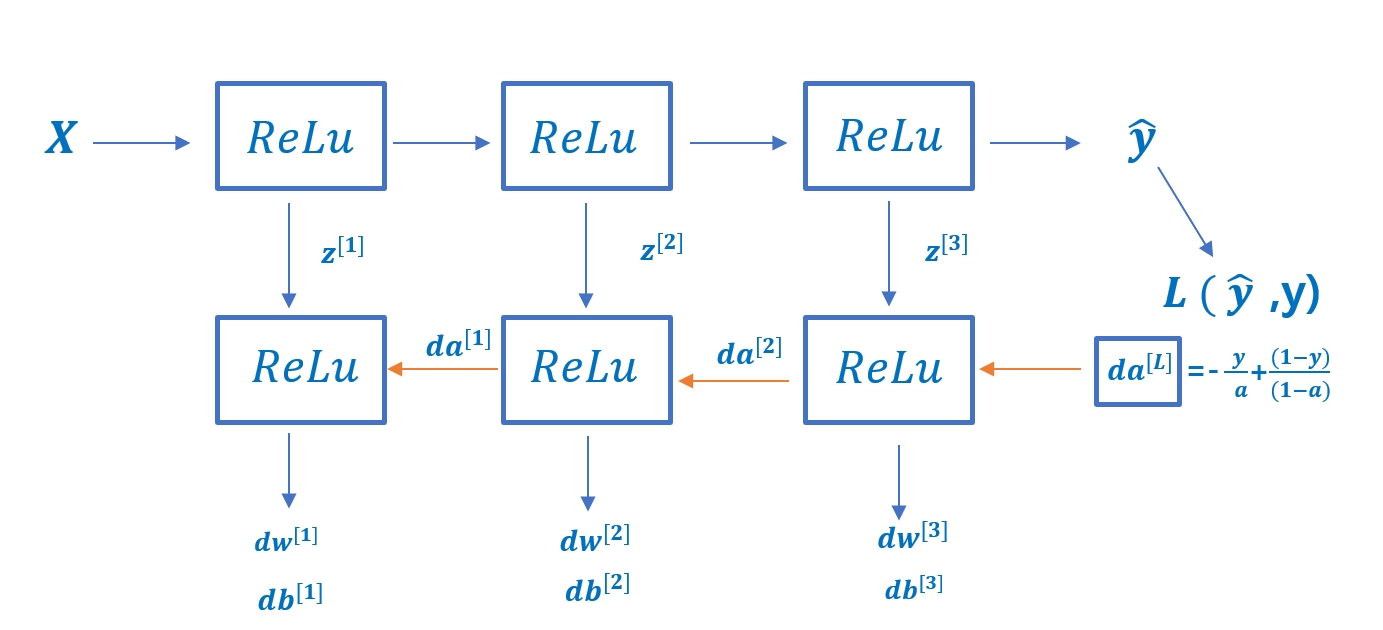


 **<Forward  propagation 실행 순서>**

 1. 입력 X를 받는다.

 2. ReLU를 활성화 함수로 갖는 첫 번째 층이 있다.

 3. 두 번째 층에는 또 다른 ReLU 활성화 함수가 있다.

 4. 세 번째 층에는 시그모이드 활성화 함수를 사용할 수도 있다
(단!바이너리 분류를 하는 경우)

 5. 세번째층에서나온 출력값은 y의 예측값이 되고 이를 통해 손실을 계산할 수 있다


 **<Backward propagation 실행 순서>**


 1. $dW^{[3]}$, $db^[3]$을 계산한다.
* 계산하는 과정에서 cache에서 세번째층 으로부터  $z^{[1]}$를 옮겨받는다.

 2. $dW^{[2]}$, $db^{[2]}$를 계산한다.
* 계산하는 과정에서 cache에서 두번째층 으로부터  $z^{[2]}$를 옮겨받는다.
* 3번째층에서  d$a^{[2]}$값을 받는다 

 3. $dW^{[1]}$, $db^{[1]}$를 계산한다.
* 계산하는 과정에서 cache에서 세번째층 으로부터  $z^{[3]}$를 옮겨받는다.










###**세부사항**




* 정방향 반복은 입력 데이터 X로 초기화한다.

* 역방향 반복은 입력데이터가 $da^{[l]}$이다.

  (로지스틱 회귀에서 바이너리 분류를 할 때 $da^{[l]}$=-$\frac{y}{a}$+$\frac{1-y}{1-a}$이다.)

* 벡터화된 구현을한다면? 
  
   $dA^{[l]}$=(-$\frac{y^{[l]}}{a^{[l]}}$+$\frac{1-y^{[l]}}{1-a^{[l]}}$$\cdots$-$\frac{y^{[m]}}{a^{[m]}}$+$\frac{1-y^{[m]}}{1-a^{[m]}}$)
